### Piyush Gupta
### piyushguptaa741@gmail.com

# Wine Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno
import squarify

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

## Read data set

In [3]:
wine=pd.read_csv(r'C:\Users\PIYUSH\Downloads\Knight ML Assignment\Data\train.csv')

In [4]:
wine.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


## Data analysis

In [5]:
wine.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_name,63264,15,@vossroger,17539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,82622,38,US,38573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_title,82657,76983,Korbel NV Brut Sparkling (California),8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_description,82657,77628,Law enforcement veteran-turned-winemaker Cindy...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,59010,26424,Reserve,1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,82657,NaN,NaN,NaN,88.5446,3.09965,80,86,88,91,100
price,77088,NaN,NaN,NaN,36.9222,43.6983,4,18,27,45,3300
province,82622,358,California,25736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,69903,1019,Napa Valley,3334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,35949,17,Central Coast,7503,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing values

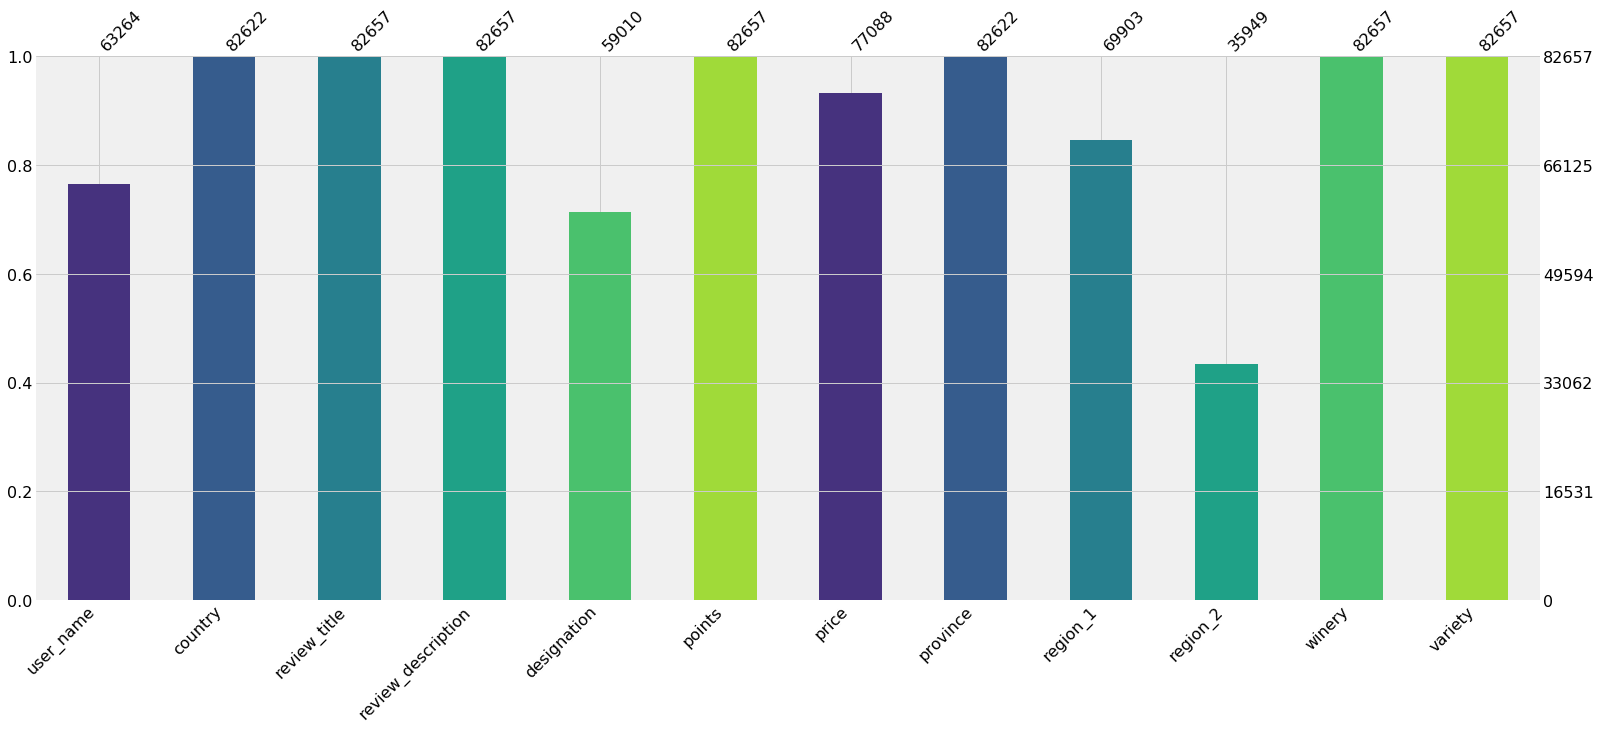

In [6]:
msno.bar(wine,color= sns.color_palette('viridis'))

## Distribution of Wine Reviews by Top 20 Countries

In [7]:
wine.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

Number of country list in data: 38


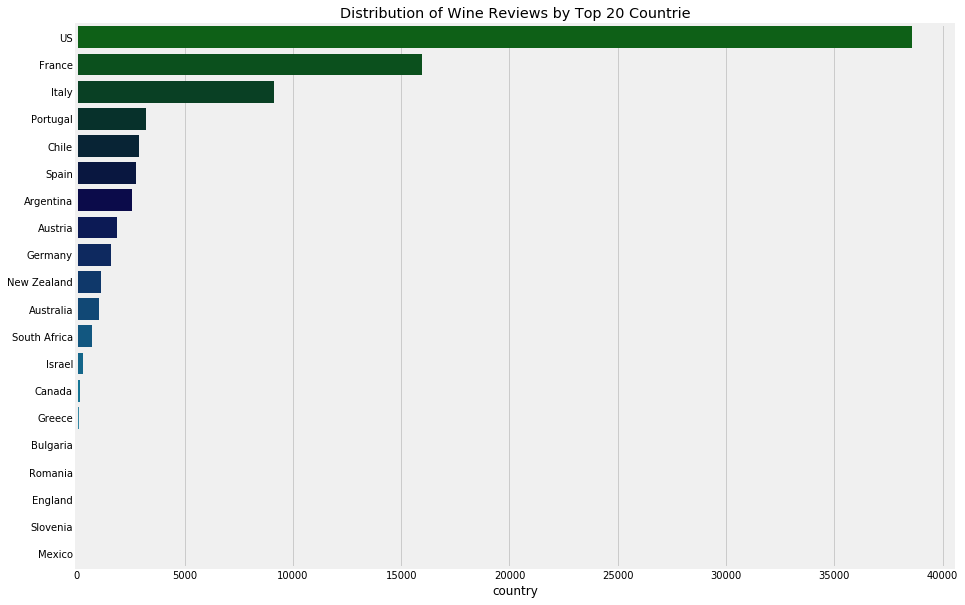

In [8]:
print('Number of country list in data:',wine['country'].nunique())
plt.figure(figsize=(14,10))
cnt = wine['country'].value_counts().to_frame()[0:20]
#plt.xscale('log')
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('Distribution of Wine Reviews by Top 20 Countrie');

* Us contribute more in the review
* The wine review for 50 countries in the dataset
***
## Distribution of wine price

Text(0.5, 1.0, 'Distribution of prices')

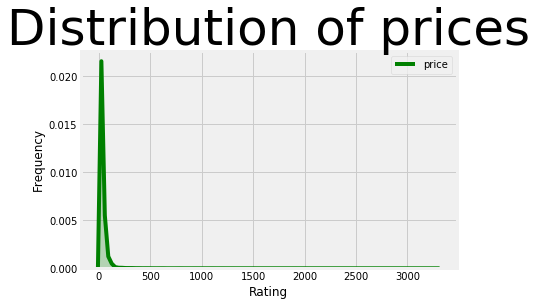

In [9]:
wine['price']=wine['price'].fillna(wine['price'].mean())

g = sns.kdeplot(wine.price, color="Green", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of prices',size = 50)

In [10]:
max(wine['price'])

3300.0

* The price of wine is starts from 4 to more than 3000. 
* The price mean and median price is less than 100,
* Thier is many outliers in the data

## Country wise average wine price

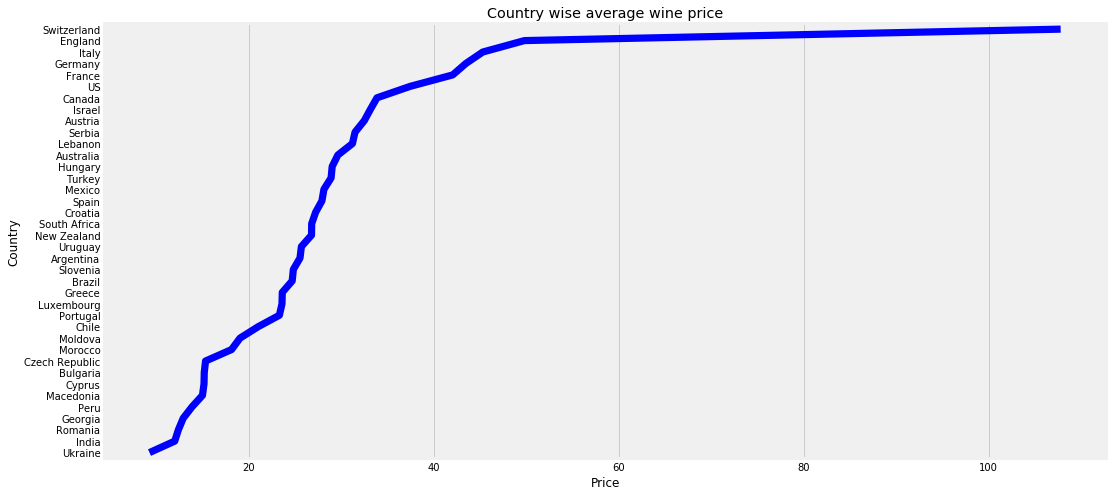

In [11]:
cnt = wine.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='b',orient='h',markers='')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

* The average price of wine in 'Switzerland' is highest.
## Country wise Expensive and Least price wine

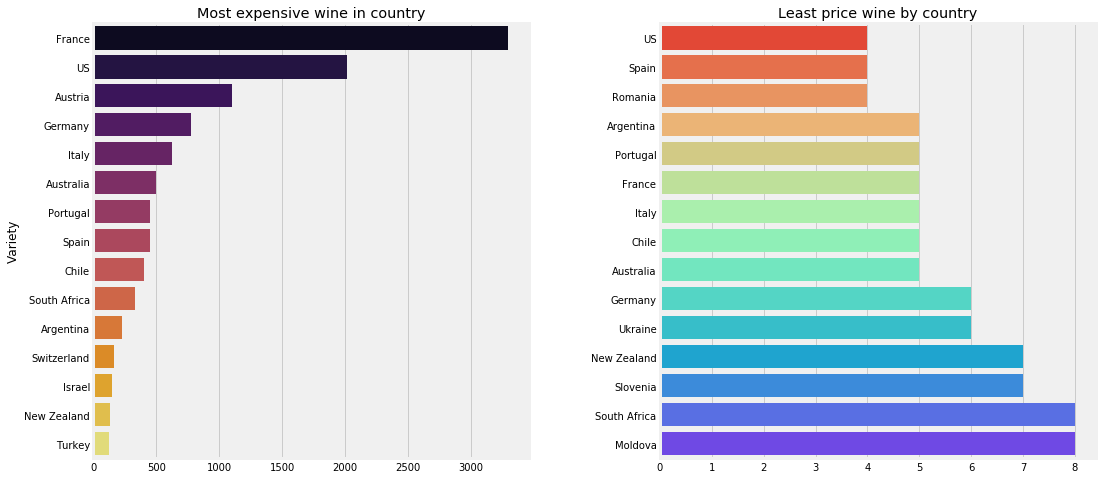

In [12]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['country']).max()['price'].sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Most expensive wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'rainbow_r',ax=ax2)
ax2.set_title('Least price wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

* The France is selling expensive wine followed by US Austria.
* The least price wine availabe at 4 bucks at Portugal, Argentian,Spain,Romania and also US.
* The most of European countries are selling wide range of wine.
***

## Average rating of wine by country wise
* Points:The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)

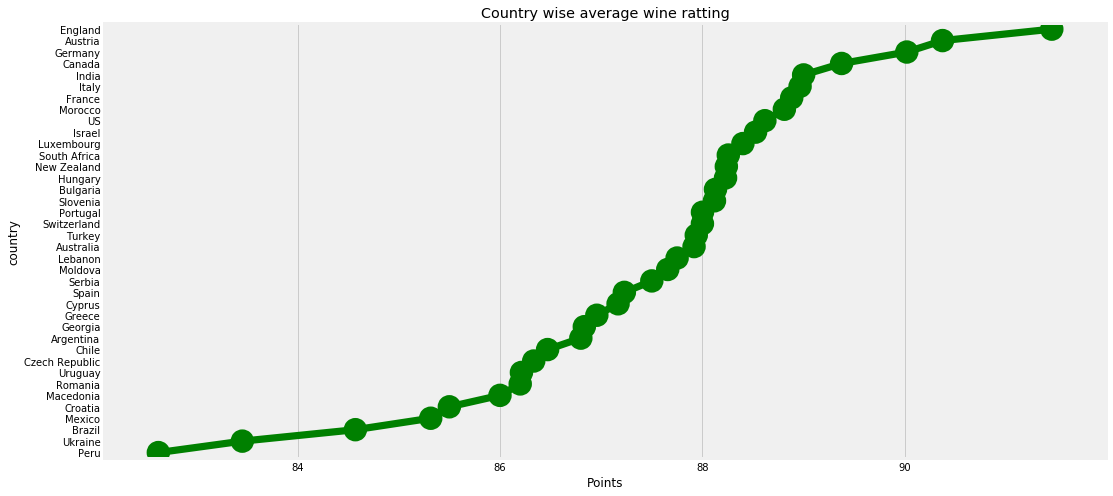

In [13]:
cnt = wine.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['points'] ,y = cnt.index ,color='g',orient='h')
plt.title('Country wise average wine ratting')
plt.xlabel('Points');

* The average rating of wine for England is top in the table.
* The coutries like Austria,Germany, India, France are top quality wine producing country.
* South korea, Montenegro produces least quality wine. 
***
## Country wise Highest and Least rated wine

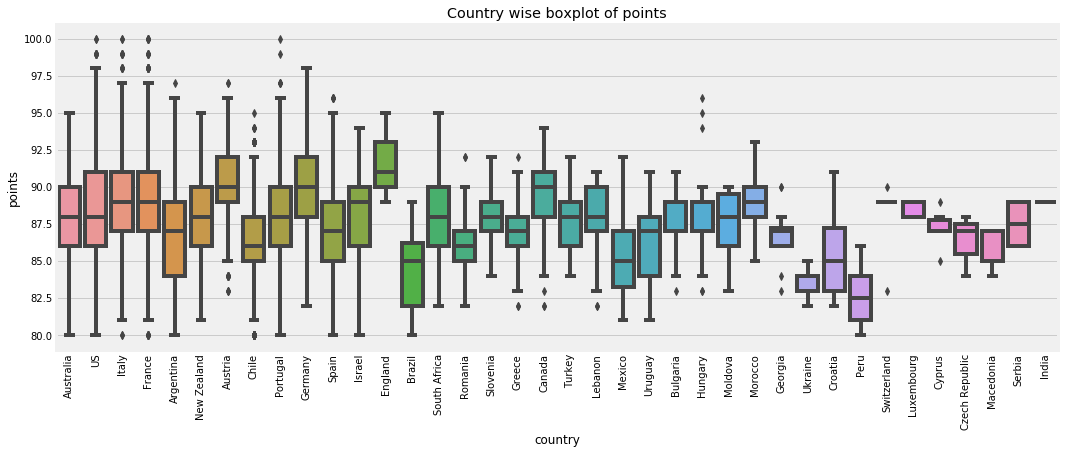

In [14]:
plt.figure(figsize=(16,6))
sns.boxplot(x = wine['country'], y = wine['points'])
#sns.pointplot(x = wine['country'], y = wine['points'])
plt.title('Country wise boxplot of points')
plt.xticks(rotation=90);

## Relation between Price and Points

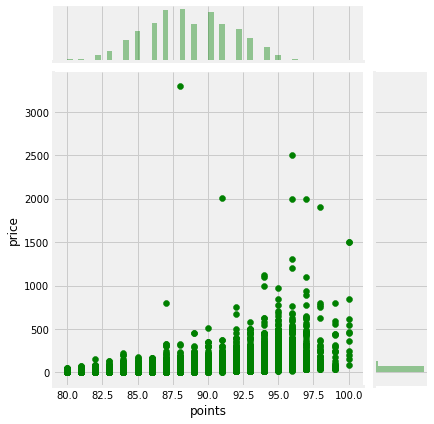

In [15]:
sns.jointplot( x = wine['points'],y = wine['price'],color='g');

## Top most wine by variety
* Variety: the type of grapes used to make the wine (ie Pinot Noir)

Number of varity of wines 28


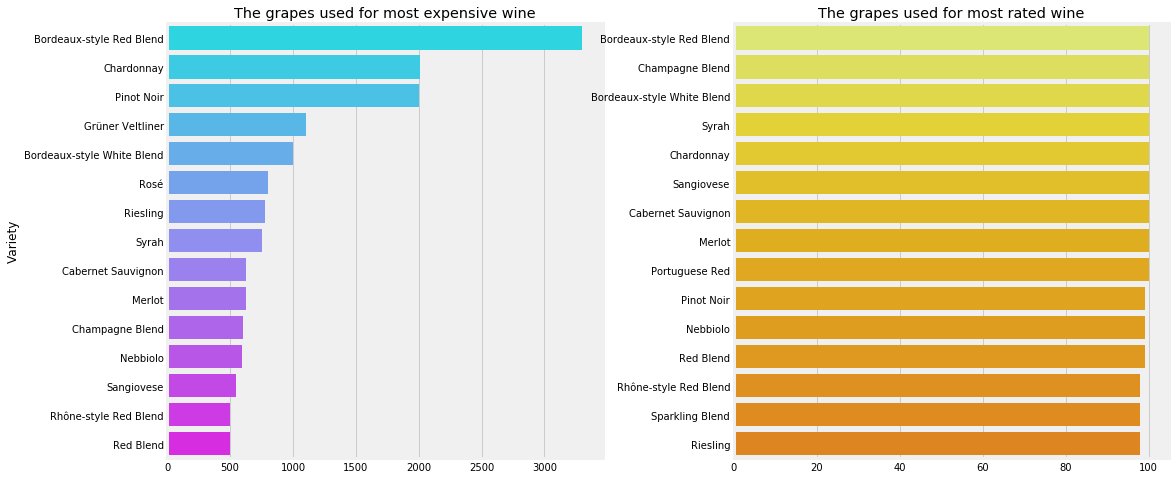

In [16]:
print('Number of varity of wines',wine['variety'].nunique())
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'cool',ax=ax1)
ax1.set_title('The grapes used for most expensive wine')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'Wistia',ax=ax2)
ax2.set_title('The grapes used for most rated wine')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

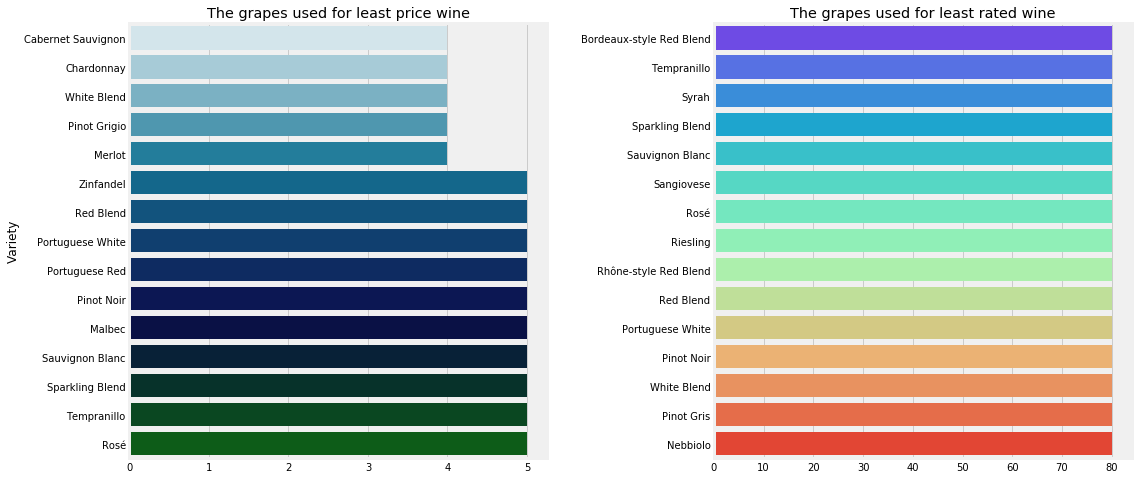

In [17]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index,palette = 'ocean_r',ax=ax1)
ax1.set_title('The grapes used for least price wine')
ax1.set_xlabel('')
ax1.set_ylabel('Variety')

cnt = wine.groupby(['variety'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index,palette= 'rainbow', ax=ax2)
ax2.set_title('The grapes used for least rated wine')
ax2.set_xlabel('')
ax2.set_ylabel('')
plt.subplots_adjust(wspace=0.4);

In [18]:
cnt = wine.groupby(['country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending=False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='PuBu',high=0.5)

,country,points,count,min,max,mean
0,Germany,98,1,775,775,775
1,France,100,7,150,1500,746.286
2,Italy,100,2,460,550,505
3,Germany,97,6,250,775,501.333
4,Portugal,100,1,450,450,450
5,Portugal,99,1,426,426,426
6,Italy,99,7,175,595,350.714
7,France,98,15,36.9222,1900,345.307
8,France,97,50,36.9222,2000,277.132
9,Australia,95,5,95,500,274


## Designation
* The vineyard within the winery where the grapes that made the wine are from.
* A [vineyard](#https://en.wikipedia.org/wiki/Vineyard) is a plantation of grape-bearing vines, grown mainly for winemaking, but also raisins, table grapes and non-alcoholic grape juice. The science, practice and study of vineyard production is known as viticulture.

Number of vineyard designation 26424


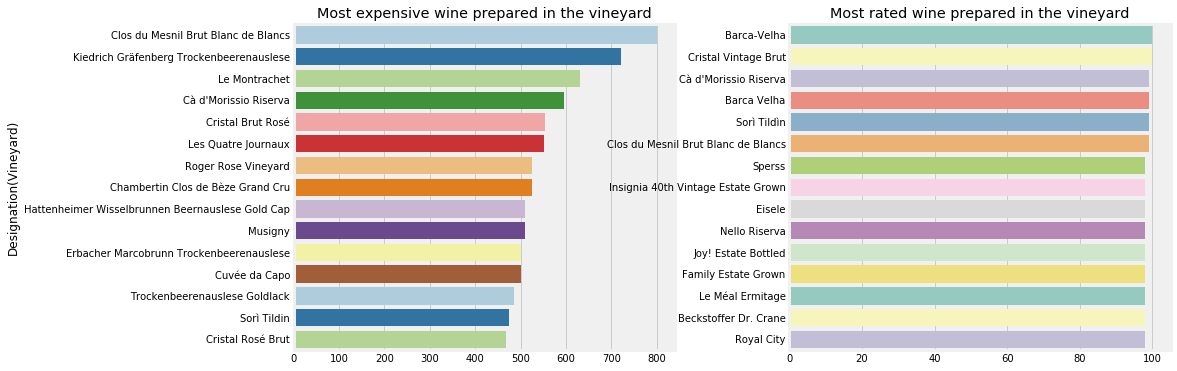

In [19]:
print('Number of vineyard designation',wine['designation'].nunique())
cnt = wine.groupby(['designation'])['price'].mean().to_frame().sort_values(by='price',ascending=False)[:15]
f,ax = plt.subplots(1,2,figsize= (14,6))
ax1,ax2 = ax.flatten()
sns.barplot(cnt['price'], y = cnt.index, palette = 'Paired', ax = ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Designation(Vineyard)')
ax1.set_title('Most expensive wine prepared in the vineyard')

cnt = wine.groupby(['designation'])['points'].mean().to_frame().sort_values(by = 'points', ascending = False)[:15]
sns.barplot(cnt['points'], y = cnt.index, palette = 'Set3', ax = ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Most rated wine prepared in the vineyard')
plt.subplots_adjust(wspace=0.3)

## Province
* The province or state that the wine is from

Number of province: 358


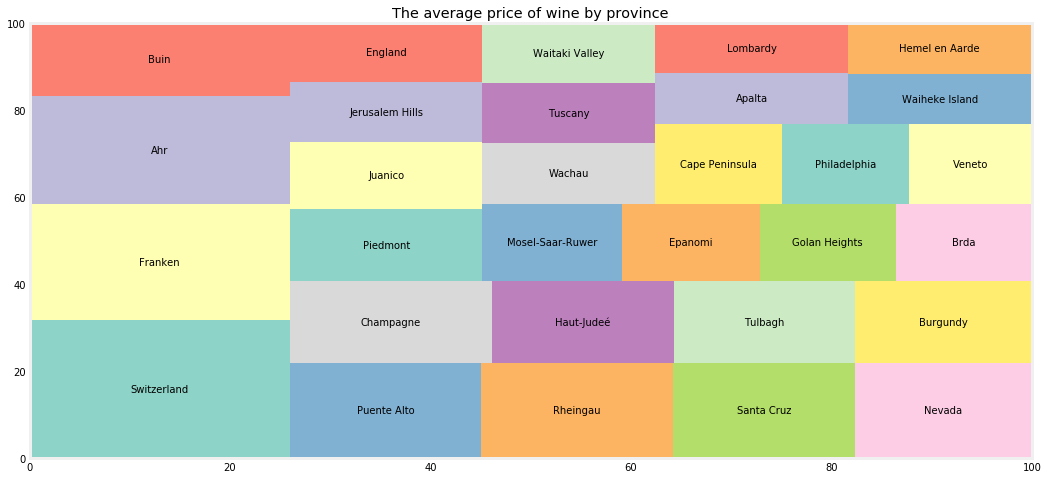

In [20]:
print('Number of province:',wine['province'].nunique())
cnt = wine.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,8))
squarify.plot(cnt['price'].fillna(0.001),label=cnt.index,color= sns.color_palette('Set3'))
plt.title('The average price of wine by province');

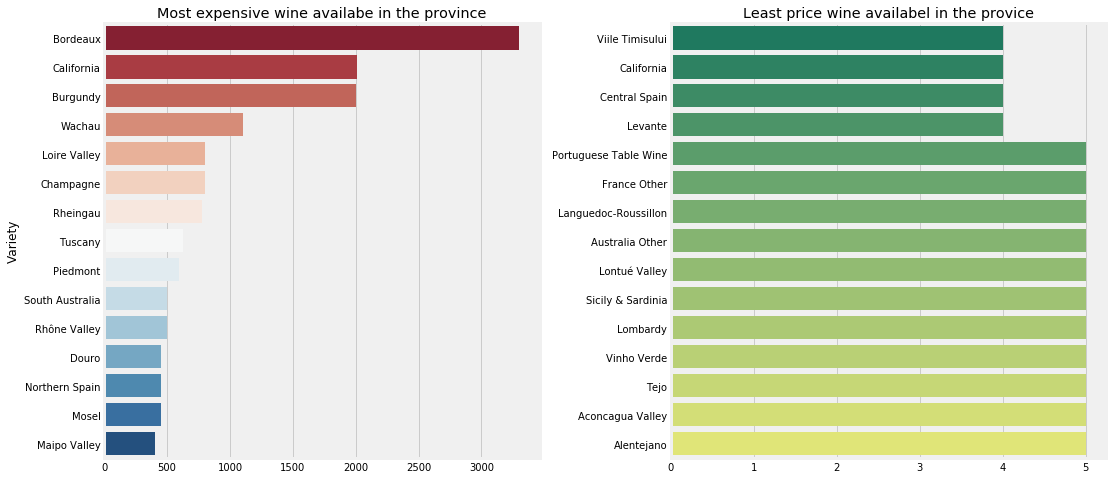

In [21]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['province'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'RdBu',ax=ax1)
ax1.set_title('Most expensive wine availabe in the province')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['province'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'summer',ax=ax2)
ax2.set_title('Least price wine availabel in the provice')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

In [22]:
cnt = wine.groupby(['province','country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Blues',high=0.5)

,province,country,points,count,min,max,mean
0,Bordeaux,France,100,5,150,1500,871.4
1,Champagne,France,99,1,800,800,800
2,Rheingau,Germany,98,1,775,775,775
3,Rheingau,Germany,97,4,445,775,579.5
4,Burgundy,France,99,1,560,560,560
5,Tuscany,Italy,100,2,460,550,505
6,Douro,Portugal,100,1,450,450,450
7,Burgundy,France,97,13,95,886,440.462
8,Mosel,Germany,97,1,440,440,440
9,Champagne,France,100,2,250,617,433.5


## Description: 
* A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.


(-0.5, 399.5, 199.5, -0.5)

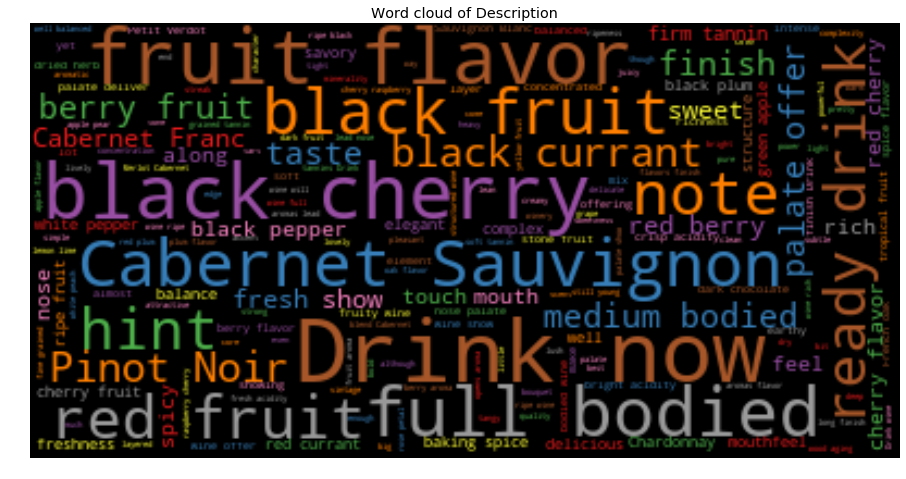

In [23]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wine['review_description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')

In [24]:
wine.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


(-0.5, 399.5, 199.5, -0.5)

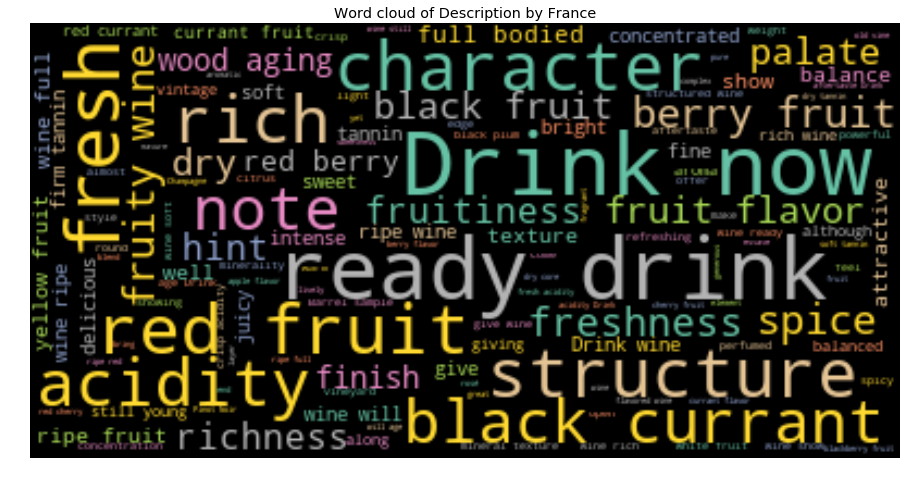

In [25]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description by France')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS)
wc.generate(' '.join(wine[wine['country'] =='France']['review_description']))
plt.imshow(wc.recolor(colormap='Set2'),interpolation="bilinear")
plt.axis('off')

In [26]:
X = wine.drop(['review_title','user_name','country','designation','points','province','region_1','region_2','variety','winery'], axis = 1)
y = wine.variety

In [29]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
le.classes_
y=le.transform(y)

In [40]:
print(y)

[ 5 17 11 ...  6  0  3]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(61992, 2) (20665, 2) (61992,) (20665,)


In [46]:
from scipy.sparse import hstack

vect = CountVectorizer(stop_words = stop)
X_train_dtm = vect.fit_transform(X_train.review_description)
price = X_train.price.values[:,None]
X_train_dtm = hstack((X_train_dtm, price))
X_train_dtm.shape

(61992, 23434)

In [47]:
X_test_dtm = vect.transform(X_test.review_description)
price_test = X_test.price.values[:,None]
X_test_dtm = hstack((X_test_dtm, price_test))
X_test_dtm

<20665x23434 sparse matrix of type '<class 'numpy.float64'>'
	with 529046 stored elements in COOrdinate format>

In [48]:
X_train_dtm.shape

(61992, 23434)

In [51]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train_dtm, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
clf.score(X_train_dtm,y_train)

0.2165279390889147

#### Due to computational issues I couldn't play with the fatures to see which one can give better accuracy 